# Imports

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import pandas as pd
import shutil
import os
import imgaug.augmenters as iaa

# Preprocessing

In [19]:
# Function that plots a single image
def plot_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

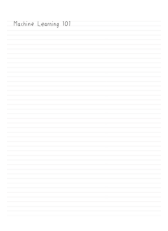

[[0.109074 0.080849 0.143905 0.039857]
 [0.266728 0.080849 0.153071 0.04569 ]
 [0.386114 0.081173 0.077452 0.035969]]


In [20]:
"""
# Loads the images and bounding box labels
"""

# Read all images in pages directory
paths = glob.glob('pages/*.jpg')
images_v1 = []
for path in paths:
    image = cv2.imread(path)
    images_v1.append(image)

# Read the labeled bounding boxes per image
labels_v1 = []
for path in paths:
    # Remove jpg from path. Add txt
    path = path[:-4] + '.txt'
    label = pd.read_csv(path, sep=" ", header=None, names=['label','x', 'y', 'w', 'h'])
    label = label.drop(columns=['label'])
    label = label.to_numpy()
    labels_v1.append(label)

plot_image(images_v1[0])
print(labels_v1[0])


In [21]:
"""
Formats the coordinates in labels from YOLO to xmin, ymin, xmax, ymax
"""

# Function that formats bounding box coordinates
def format_coordinates(bounding_box, img_width, img_height):
    x = bounding_box[0]
    y = bounding_box[1]
    w = bounding_box[2]
    h = bounding_box[3]

    x_min = ((2 * x * img_width) - (w * img_width)) / 2
    x_max = ((2 * x * img_width) + (w * img_width)) / 2
    y_min = ((2 * y * img_height) - (h * img_height)) / 2
    y_max = ((2 * y * img_height) + (h * img_height)) / 2

    return x_min, x_max, y_min, y_max

labels_v2 = []
for label in labels_v1:
    new_label = []
    for bounding_box in label:
        x_min, x_max, y_min, y_max = format_coordinates(bounding_box, images_v1[0].shape[1], images_v1[0].shape[0])
        bounding_box = [int(x_min), int(x_max), int(y_min), int(y_max)]
        new_label.append(bounding_box)
    labels_v2.append(new_label)

print(labels_v2[0])
    #x_min, x_max, y_min, y_max = format_coordinates(label, images_v1[0].shape[1], images_v1[0].shape[0])
    #labels_v2.append([x_min, x_max, y_min, y_max])

[[80, 394, 188, 310], [415, 749, 179, 319], [758, 927, 194, 306]]


In [22]:
"""
Crops the bounding boxes from the images.
"""

# Crop images from the bounding box labels
images_v2 = []
for image, label in zip(images_v1, labels_v2):
    for bounding_box in label:
        x_min = bounding_box[0]
        x_max = bounding_box[1]
        y_min = bounding_box[2]
        y_max = bounding_box[3]
        # Crop bounding box from image
        new_image = image[int(y_min):int(y_max), int(x_min):int(x_max)]
        # Add to new images list
        images_v2.append(new_image)

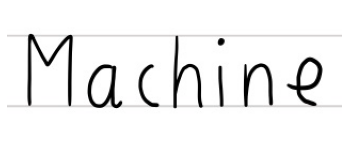

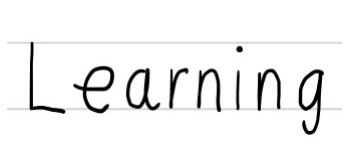

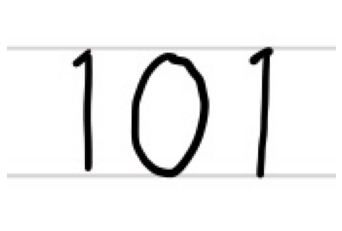

In [24]:
# Plot 3 of the cropped images
for image in images_v2[:3]:
    plot_image(image)

In [25]:
"""
Resizes the images to fit the yolo model format
"""

# Resize images
images_v3 = []
for image in images_v2:
    new_image = cv2.resize(image, (608, 608))
    images_v3.append(new_image)

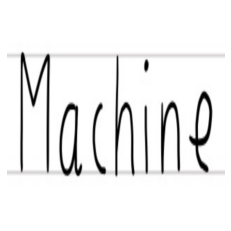

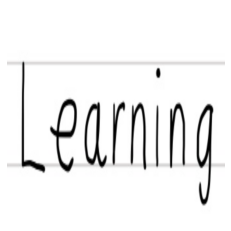

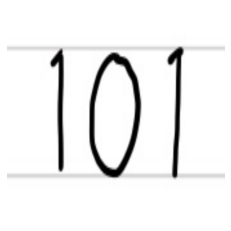

In [26]:
# Plot 3 of the resized images
for image in images_v3[:3]:
    plot_image(image)

In [27]:
# Shape of images
images_v3 = np.array(images_v3)
print(images_v3.shape)

(3, 608, 608, 3)


In [28]:
"""
Thresholds the images to remove noise
"""

# Threshold images
images_v4 = []
for image in images_v3:
    new_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)[1]
    images_v4.append(new_image)

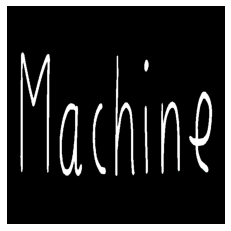

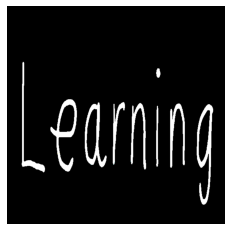

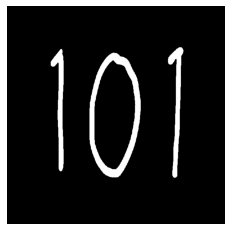

In [29]:

# Plot 2 of the thresholded images
for image in images_v4[:3]:
    plot_image(image)

In [30]:
"""
Saves to directory
"""

if os.path.exists("test_words"):
    shutil.rmtree("test_words")
os.mkdir("test_words")

# Write images to file
for i, image in enumerate(images_v4):
    cv2.imwrite("test_words/" + str(i) + ".jpg", image)



